## 윈도우에서 lightgbm 설치
 !pip install lightgbm
 
## 맥에서 설치
brew 설치  
brew update   
brew upgrade   
!brew install lightgbm 


In [4]:
!pip install lightgbm

  Using cached lightgbm-2.3.1-py2.py3-none-macosx_10_9_x86_64.macosx_10_10_x86_64.macosx_10_11_x86_64.macosx_10_12_x86_64.macosx_10_13_x86_64.macosx_10_14_x86_64.macosx_10_15_x86_64.whl (679 kB)


In [5]:
import lightgbm as lgb

In [23]:
import shutil
import os.path
import os
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import rcParams
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 12, 8
plt.rc('font', family='Malgun Gothic')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
np.set_printoptions(precision=4)

In [8]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 850,
    "n_estimators": 1000
}

In [9]:
gbm = lgb.LGBMRegressor(**hyper_params)
RF=RandomForestRegressor(n_estimators=300,max_depth=9,random_state=11)
LR=LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

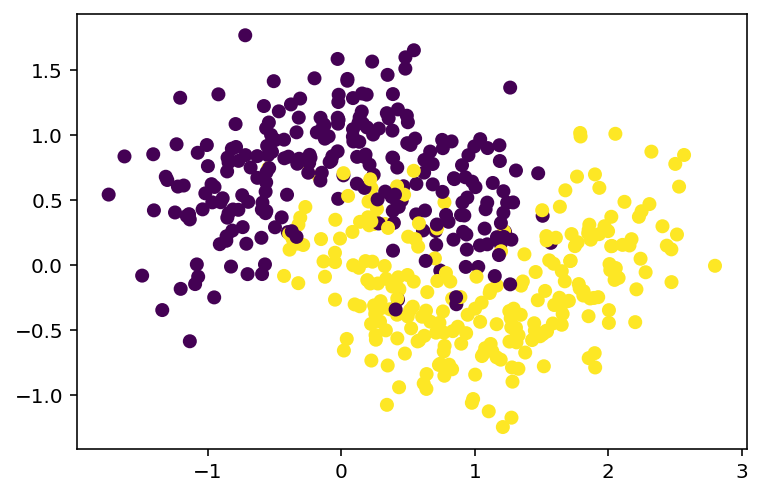

In [13]:
plt.scatter(X[:,0], X[:,1], c=y)

In [14]:
RF.fit(X_train, y_train) 
RF.predict(X_test)
LR.fit(X_train, y_train) 
LR.predict(X_test)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)
gbm.predict(X_test)

[1]	valid_0's l1: 0.498577	valid_0's l2: 0.248598	valid_0's auc: 0.939805
Training until validation scores don't improve for 1000 rounds
[2]	valid_0's l1: 0.497065	valid_0's l2: 0.2471	valid_0's auc: 0.939805
[3]	valid_0's l1: 0.49556	valid_0's l2: 0.245616	valid_0's auc: 0.939805
[4]	valid_0's l1: 0.494063	valid_0's l2: 0.244148	valid_0's auc: 0.939805
[5]	valid_0's l1: 0.492574	valid_0's l2: 0.242695	valid_0's auc: 0.939805
[6]	valid_0's l1: 0.491092	valid_0's l2: 0.241256	valid_0's auc: 0.939805
[7]	valid_0's l1: 0.489618	valid_0's l2: 0.239832	valid_0's auc: 0.939805
[8]	valid_0's l1: 0.488161	valid_0's l2: 0.238433	valid_0's auc: 0.939805
[9]	valid_0's l1: 0.486702	valid_0's l2: 0.237037	valid_0's auc: 0.939805
[10]	valid_0's l1: 0.48526	valid_0's l2: 0.235666	valid_0's auc: 0.939805
[11]	valid_0's l1: 0.483937	valid_0's l2: 0.234417	valid_0's auc: 0.941983
[12]	valid_0's l1: 0.48262	valid_0's l2: 0.233182	valid_0's auc: 0.941983
[13]	valid_0's l1: 0.48131	valid_0's l2: 0.23196	va

[241]	valid_0's l1: 0.278388	valid_0's l2: 0.103717	valid_0's auc: 0.962474
[242]	valid_0's l1: 0.277763	valid_0's l2: 0.103474	valid_0's auc: 0.962731
[243]	valid_0's l1: 0.277225	valid_0's l2: 0.10324	valid_0's auc: 0.962987
[244]	valid_0's l1: 0.276695	valid_0's l2: 0.10301	valid_0's auc: 0.962731
[245]	valid_0's l1: 0.276163	valid_0's l2: 0.102781	valid_0's auc: 0.962731
[246]	valid_0's l1: 0.275626	valid_0's l2: 0.102558	valid_0's auc: 0.963243
[247]	valid_0's l1: 0.275104	valid_0's l2: 0.102334	valid_0's auc: 0.963243
[248]	valid_0's l1: 0.274585	valid_0's l2: 0.102113	valid_0's auc: 0.963243
[249]	valid_0's l1: 0.274055	valid_0's l2: 0.101897	valid_0's auc: 0.963243
[250]	valid_0's l1: 0.273541	valid_0's l2: 0.10168	valid_0's auc: 0.963243
[251]	valid_0's l1: 0.272932	valid_0's l2: 0.101444	valid_0's auc: 0.963243
[252]	valid_0's l1: 0.272326	valid_0's l2: 0.10121	valid_0's auc: 0.963243
[253]	valid_0's l1: 0.271723	valid_0's l2: 0.100979	valid_0's auc: 0.963755
[254]	valid_0's 

[404]	valid_0's l1: 0.205109	valid_0's l2: 0.0815025	valid_0's auc: 0.967853
[405]	valid_0's l1: 0.204822	valid_0's l2: 0.0814331	valid_0's auc: 0.968366
[406]	valid_0's l1: 0.204536	valid_0's l2: 0.0813644	valid_0's auc: 0.968366
[407]	valid_0's l1: 0.204251	valid_0's l2: 0.0812966	valid_0's auc: 0.968366
[408]	valid_0's l1: 0.203968	valid_0's l2: 0.0812297	valid_0's auc: 0.968366
[409]	valid_0's l1: 0.203687	valid_0's l2: 0.0811636	valid_0's auc: 0.968622
[410]	valid_0's l1: 0.203407	valid_0's l2: 0.0810983	valid_0's auc: 0.968622
[411]	valid_0's l1: 0.203105	valid_0's l2: 0.0810331	valid_0's auc: 0.968622
[412]	valid_0's l1: 0.202731	valid_0's l2: 0.0809431	valid_0's auc: 0.968622
[413]	valid_0's l1: 0.20236	valid_0's l2: 0.0808541	valid_0's auc: 0.968622
[414]	valid_0's l1: 0.20199	valid_0's l2: 0.0807661	valid_0's auc: 0.968366
[415]	valid_0's l1: 0.201671	valid_0's l2: 0.0806852	valid_0's auc: 0.968366
[416]	valid_0's l1: 0.201353	valid_0's l2: 0.0806051	valid_0's auc: 0.968366
[

[579]	valid_0's l1: 0.167724	valid_0's l2: 0.0734159	valid_0's auc: 0.972464
[580]	valid_0's l1: 0.167613	valid_0's l2: 0.0733875	valid_0's auc: 0.972464
[581]	valid_0's l1: 0.167476	valid_0's l2: 0.0733217	valid_0's auc: 0.972464
[582]	valid_0's l1: 0.167345	valid_0's l2: 0.0732564	valid_0's auc: 0.972464
[583]	valid_0's l1: 0.167229	valid_0's l2: 0.0731916	valid_0's auc: 0.972464
[584]	valid_0's l1: 0.167113	valid_0's l2: 0.0731274	valid_0's auc: 0.972464
[585]	valid_0's l1: 0.167004	valid_0's l2: 0.0730637	valid_0's auc: 0.972464
[586]	valid_0's l1: 0.166896	valid_0's l2: 0.0730006	valid_0's auc: 0.972464
[587]	valid_0's l1: 0.166794	valid_0's l2: 0.072938	valid_0's auc: 0.972464
[588]	valid_0's l1: 0.166697	valid_0's l2: 0.0728759	valid_0's auc: 0.972464
[589]	valid_0's l1: 0.166601	valid_0's l2: 0.0728144	valid_0's auc: 0.972464
[590]	valid_0's l1: 0.166518	valid_0's l2: 0.0727688	valid_0's auc: 0.972464
[591]	valid_0's l1: 0.166507	valid_0's l2: 0.0727772	valid_0's auc: 0.972464


array([ 4.67349800e-01,  2.78723437e-01,  4.63600863e-01,  1.00286348e+00,
        9.01039782e-01,  8.34359190e-01,  1.46524627e-02,  5.08283726e-02,
        2.06560117e-01,  3.68153293e-02,  1.01884368e+00, -9.29905920e-03,
        8.78365504e-01,  7.61064774e-01,  1.04727441e+00,  8.06936757e-02,
       -5.00893307e-03,  1.02370388e+00,  9.37180118e-01,  1.45437565e-01,
        4.21316117e-02,  7.20254934e-01,  5.04215835e-01,  1.37880840e-01,
        2.20711302e-01,  3.00046550e-01,  1.03170340e+00,  5.76209288e-03,
        1.01234960e+00,  3.26826037e-02,  1.01527001e+00,  1.04969709e+00,
        9.60988497e-02,  2.64718226e-02,  9.71880950e-01,  3.29073646e-02,
       -1.39344985e-01,  9.81208604e-01,  9.83685904e-01,  1.01922857e+00,
        5.56965866e-01,  8.53938831e-01,  7.22306386e-02,  1.66938450e-01,
        8.40896484e-02,  1.49164445e-01,  7.35731192e-01,  4.07686432e-01,
        1.01833286e+00,  6.04919573e-01,  8.44400040e-01,  9.98966460e-01,
       -9.03786332e-03,  

In [15]:
print(gbm.score(X_test,y_test))
print(RF.score(X_test, y_test))
print(LR.score(X_test, y_test))

0.7163425482984302
0.6961496958461811
0.5615725394428597


# 그래프 확인

In [16]:
def rmsle(predict,actual):
    log_predict=np.log(predict+1)
    log_actual=np.log(actual+1)
    difference=log_predict-log_actual
    difference=np.square(difference)
    mean_difference=difference.mean()
    score=np.sqrt(mean_difference)
    return score
rmsle_scorer=make_scorer(rmsle)

In [17]:
def rmse(actual, predict):
    score1= np.sqrt(((actual - predict)**2).mean())  
    return score1
rmse_scorer=make_scorer(rmse)

In [18]:
def mae(actual, predict):
    score2=((abs(actual - predict)).mean())
    return score2
mae_scorer=make_scorer(mae)

In [19]:
def me(actual, predict):
    score3=max(abs(actual - predict))
    return score3
me_scorer=make_scorer(me)

In [22]:
n_estimators=100
num_epoch=2
hyper_parameter=[]
for epoch in range(num_epoch):
    max_depth=np.random.randint(5,10)
    max_features=np.random.uniform(0.8,1.0)
    model=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,random_state=31,n_jobs=-1)
    score=cross_val_score(model,X_train,y_train,cv=5,scoring=rmsle_scorer).mean()
    score1=cross_val_score(model,X_train,y_train,cv=5,scoring=rmse_scorer).mean()
    score2=cross_val_score(model,X_train,y_train,cv=5,scoring=mae_scorer).mean()
    score3=cross_val_score(model,X_train,y_train,cv=5,scoring=me_scorer).mean()
    hyper_parameter.append({'RMSLE':score,'RMSE':score1,'MAE':score2,'ME':score3,'max_depth':max_depth,'max_feature':max_features})

hyper_parameter


[{'RMSLE': 0.186776968284281,
  'RMSE': 0.2671273213589319,
  'MAE': 0.142884090221728,
  'ME': 0.9662774958992928,
  'max_depth': 7,
  'max_feature': 0.9134846641963127},
 {'RMSLE': 0.18779783486037238,
  'RMSE': 0.2688557136729383,
  'MAE': 0.13984347836480343,
  'ME': 0.9658469807153631,
  'max_depth': 8,
  'max_feature': 0.8286161432527597}]

In [26]:
pd.options.display.float_format = '{:,.3f}'.format

hyper_parameter=pd.DataFrame.from_dict(hyper_parameter)
hyper_parameter.sort_values(by='RMSE')

,RMSLE,RMSE,MAE,ME,max_depth,max_feature
0,0.187,0.267,0.143,0.966,7,0.913
1,0.188,0.269,0.140,0.966,8,0.829
